# 📊 Dataset Information

**Note:** The dataset for this project is **not included in this repository** to keep the repository lightweight.  

You can download the dataset from **Kaggle** using the link below:  

[Download The Ads Performance Dataset](https://www.kaggle.com/datasets/nudratabbas/global-ads-performance-google-meta-tiktok/data)  

Please make sure to place the downloaded CSV file in the same directory as this notebook before running any code.

# Importing

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

/kaggle/input/global-ads-performance-google-meta-tiktok/global_ads_performance_dataset.csv


## Import CSV And convert to DataFrame

In [2]:
df = pd.read_csv('global_ads_performance_dataset.csv')

# Preprocessing

## Frist five row

In [3]:
df.head()

,date,platform,campaign_type,industry,country,impressions,clicks,CTR,CPC,ad_spend,conversions,CPA,revenue,ROAS
0,2024-01-21,Google Ads,Search,Fintech,UAE,59886,2113,0.0353,1.26,2662.38,159,16.74,4803.43,1.80
1,2024-01-22,TikTok Ads,Search,EdTech,UK,135608,5220,0.0385,1.18,6159.60,411,14.99,64126.68,10.41
2,2024-06-15,TikTok Ads,Video,Healthcare,USA,92313,5991,0.0649,0.85,5092.35,267,19.07,10489.07,2.06
3,2024-01-02,TikTok Ads,Shopping,SaaS,Germany,83953,5935,0.0707,1.32,7834.20,296,26.47,50505.07,6.45
4,2024-02-22,TikTok Ads,Search,Healthcare,UK,91807,4489,0.0489,1.93,8663.77,107,80.97,3369.53,0.39


## last Five row

In [4]:
df.tail()

,date,platform,campaign_type,industry,country,impressions,clicks,CTR,CPC,ad_spend,conversions,CPA,revenue,ROAS
1795,2024-07-11,TikTok Ads,Video,E-commerce,Germany,180128,10555,0.0586,0.84,8866.20,707,12.54,200566.90,22.62
1796,2024-06-23,Meta Ads,Display,EdTech,Australia,169849,5927,0.0349,0.94,5571.38,437,12.75,105321.92,18.90
1797,2024-03-01,Meta Ads,Video,Fintech,Australia,122974,2939,0.0239,1.85,5437.15,91,59.75,26004.98,4.78
1798,2024-08-02,Google Ads,Search,E-commerce,USA,28553,850,0.0298,2.06,1751.00,51,34.33,13010.72,7.43
1799,2024-01-29,Meta Ads,Display,EdTech,UK,77447,906,0.0117,1.15,1041.90,29,35.93,8284.13,7.95


## Shape of our dataset

In [5]:
df.shape

(1800, 14)

## List out all columns

In [6]:
df.columns

Index(['date', 'platform', 'campaign_type', 'industry', 'country',
       'impressions', 'clicks', 'CTR', 'CPC', 'ad_spend', 'conversions', 'CPA',
       'revenue', 'ROAS'],
      dtype='object')

## Datatype of each columns

In [7]:
df.dtypes

date              object
platform          object
campaign_type     object
industry          object
country           object
impressions        int64
clicks             int64
CTR              float64
CPC              float64
ad_spend         float64
conversions        int64
CPA              float64
revenue          float64
ROAS             float64
dtype: object

## Information of all Columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1800 non-null   object 
 1   platform       1800 non-null   object 
 2   campaign_type  1800 non-null   object 
 3   industry       1800 non-null   object 
 4   country        1800 non-null   object 
 5   impressions    1800 non-null   int64  
 6   clicks         1800 non-null   int64  
 7   CTR            1800 non-null   float64
 8   CPC            1800 non-null   float64
 9   ad_spend       1800 non-null   float64
 10  conversions    1800 non-null   int64  
 11  CPA            1800 non-null   float64
 12  revenue        1800 non-null   float64
 13  ROAS           1800 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 197.0+ KB


## Check Null Value

In [9]:
df.isnull().sum()

date             0
platform         0
campaign_type    0
industry         0
country          0
impressions      0
clicks           0
CTR              0
CPC              0
ad_spend         0
conversions      0
CPA              0
revenue          0
ROAS             0
dtype: int64

## Check Dupicate Value

In [10]:
df.duplicated().sum()

np.int64(0)

## Summary

In [11]:
df.describe()

,impressions,clicks,CTR,CPC,ad_spend,conversions,CPA,revenue,ROAS
count,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000
mean,102919.018889,3962.675556,0.038427,1.572756,6171.527272,181.562222,46.608961,30101.850450,6.450367
std,55740.900690,2941.858037,0.017082,0.800872,5776.996958,171.424239,41.185556,34560.032941,6.590986
min,5059.000000,91.000000,0.008900,0.280000,58.000000,2.000000,4.800000,142.690000,0.130000
25%,54948.000000,1678.000000,0.025400,0.950000,1966.587500,59.000000,20.202500,7275.757500,2.170000
50%,103653.000000,3318.000000,0.035550,1.460000,4393.860000,130.000000,33.375000,18362.965000,4.295000
75%,150470.250000,5628.000000,0.049800,2.050000,8455.830000,252.250000,56.812500,38963.385000,8.212500
max,199650.000000,16660.000000,0.095600,3.950000,38453.320000,1151.000000,335.860000,295028.260000,49.000000


# EDA

In [12]:
def show_fig():
    plt.tight_layout()
    plt.show()

plot_no = 1

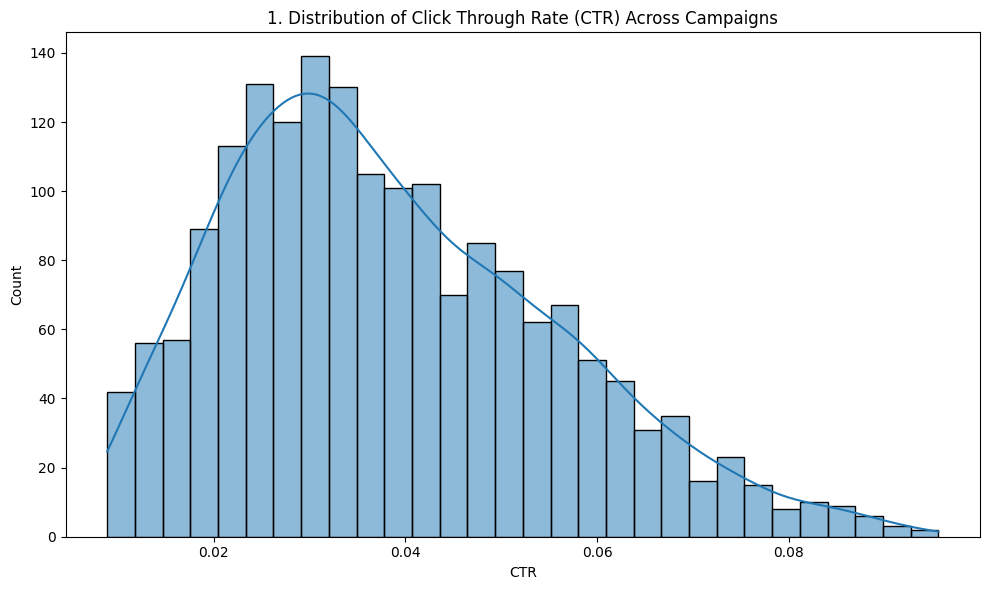

In [13]:
fig = plt.figure(figsize=(10,6))
sns.histplot(df['CTR'], bins=30, kde=True)
plt.title(f'{plot_no}. Distribution of Click Through Rate (CTR) Across Campaigns')
show_fig()
plot_no += 1


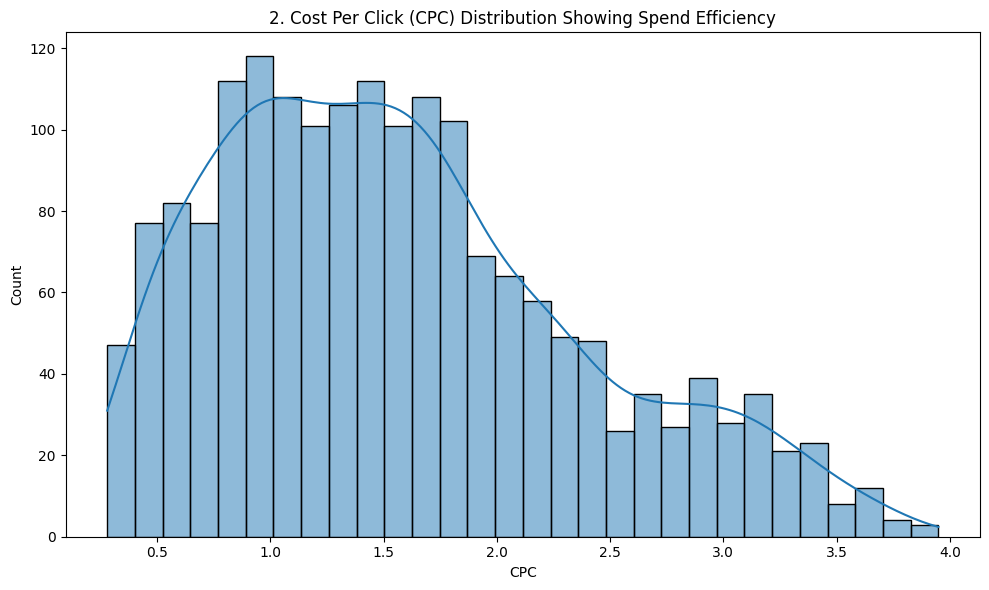

In [14]:
fig = plt.figure(figsize=(10,6))
sns.histplot(df['CPC'], bins=30, kde=True)
plt.title(f'{plot_no}. Cost Per Click (CPC) Distribution Showing Spend Efficiency')
show_fig()
plot_no += 1


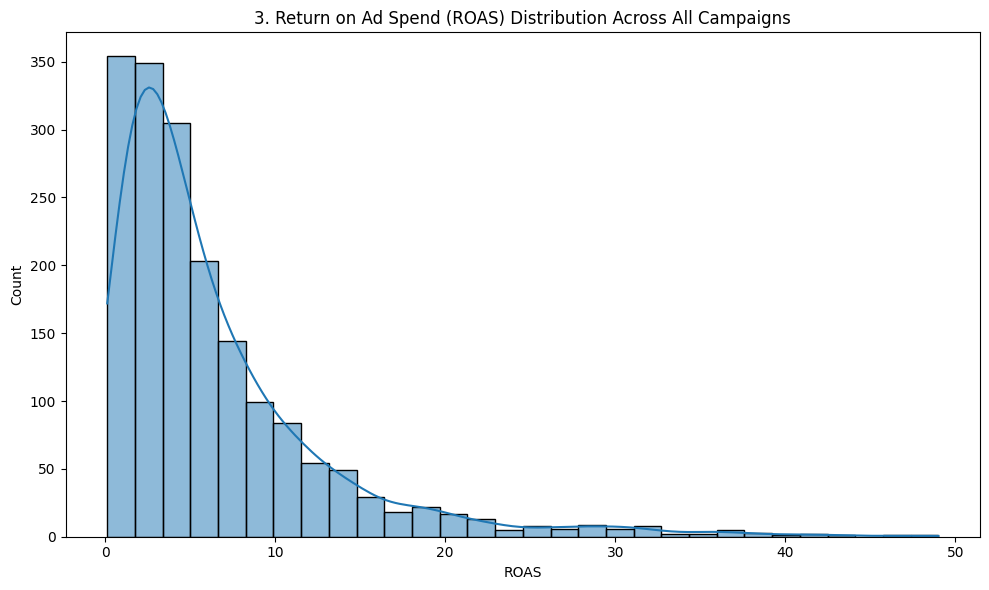

In [15]:
fig = plt.figure(figsize=(10,6))
sns.histplot(df['ROAS'], bins=30, kde=True)
plt.title(f'{plot_no}. Return on Ad Spend (ROAS) Distribution Across All Campaigns')
show_fig()
plot_no += 1


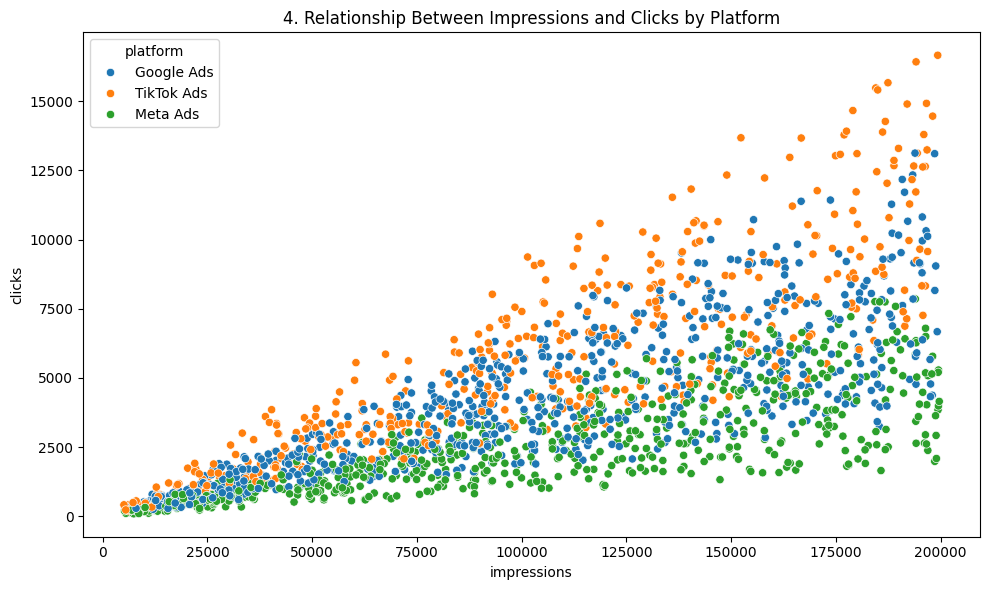

In [16]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='impressions', y='clicks', hue='platform')
plt.title(f'{plot_no}. Relationship Between Impressions and Clicks by Platform')
show_fig()
plot_no += 1


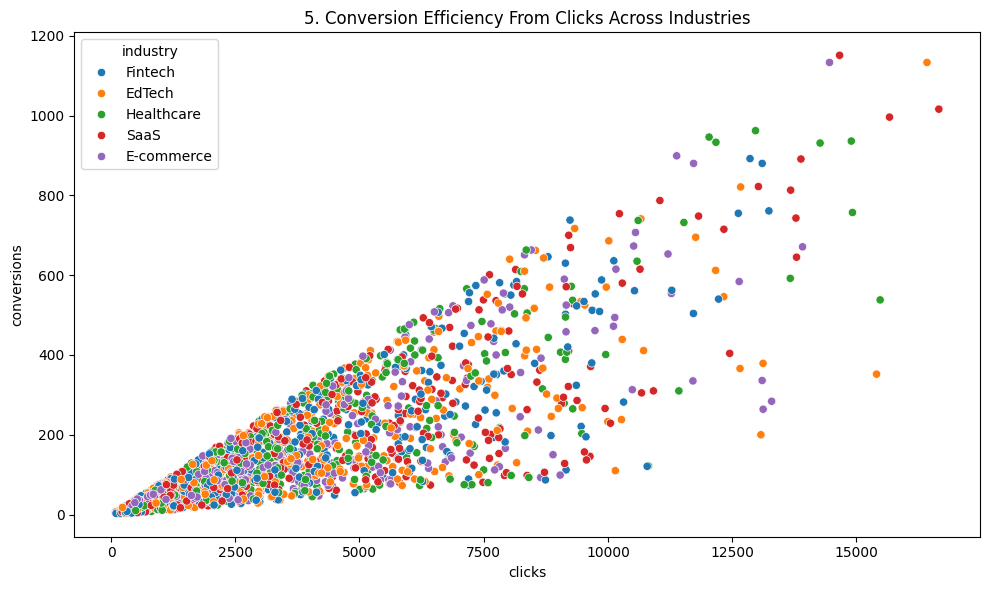

In [17]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='clicks', y='conversions', hue='industry')
plt.title(f'{plot_no}. Conversion Efficiency From Clicks Across Industries')
show_fig()
plot_no += 1


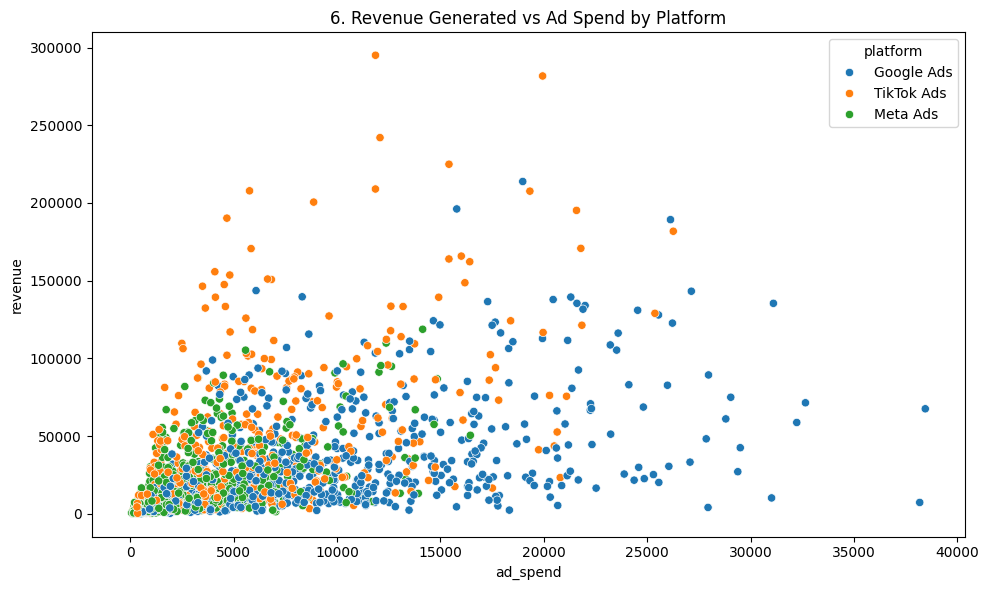

In [18]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='ad_spend', y='revenue', hue='platform')
plt.title(f'{plot_no}. Revenue Generated vs Ad Spend by Platform')
show_fig()
plot_no += 1


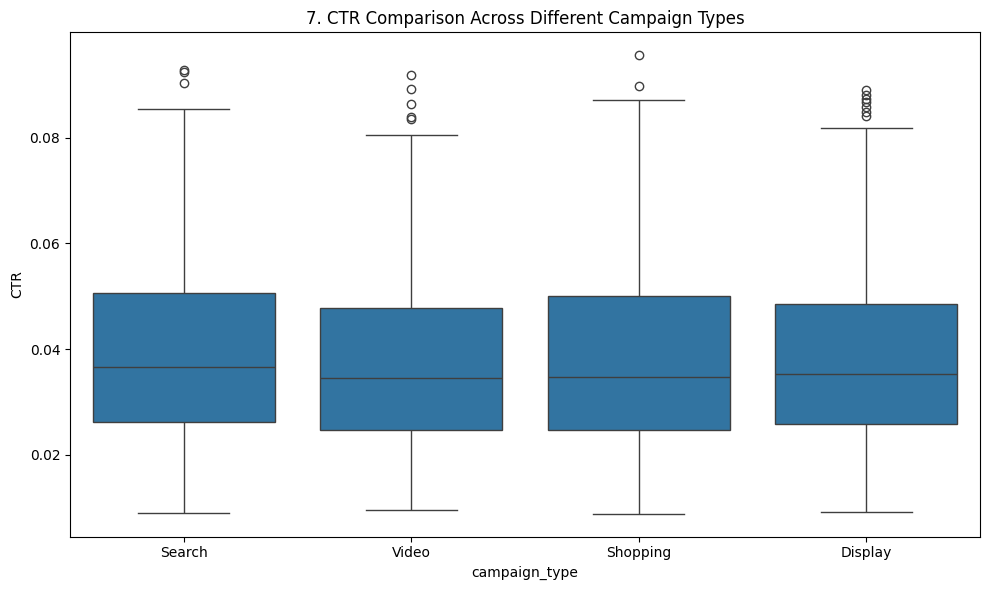

In [19]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='campaign_type', y='CTR')
plt.title(f'{plot_no}. CTR Comparison Across Different Campaign Types')
show_fig()
plot_no += 1


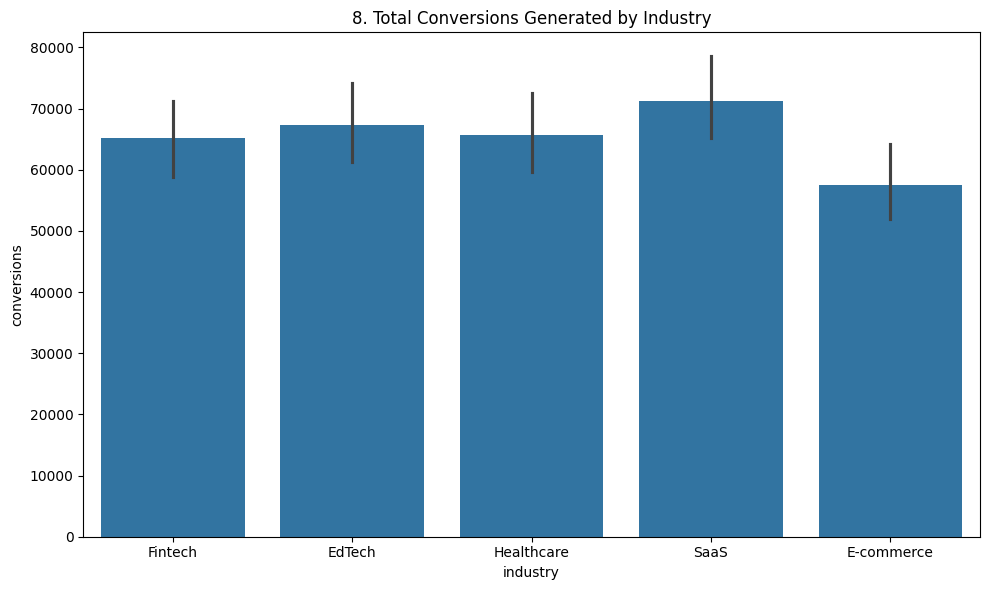

In [20]:
fig = plt.figure(figsize=(10,6))
sns.barplot(data=df, x='industry', y='conversions', estimator=sum)
plt.title(f'{plot_no}. Total Conversions Generated by Industry')
show_fig()
plot_no += 1


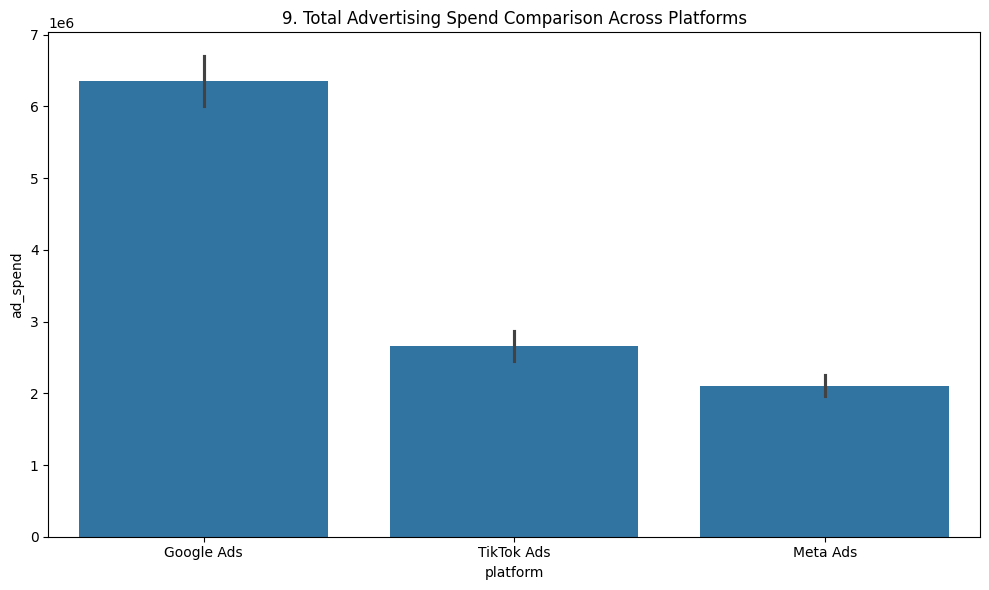

In [21]:
fig = plt.figure(figsize=(10,6))
sns.barplot(data=df, x='platform', y='ad_spend', estimator=sum)
plt.title(f'{plot_no}. Total Advertising Spend Comparison Across Platforms')
show_fig()
plot_no += 1


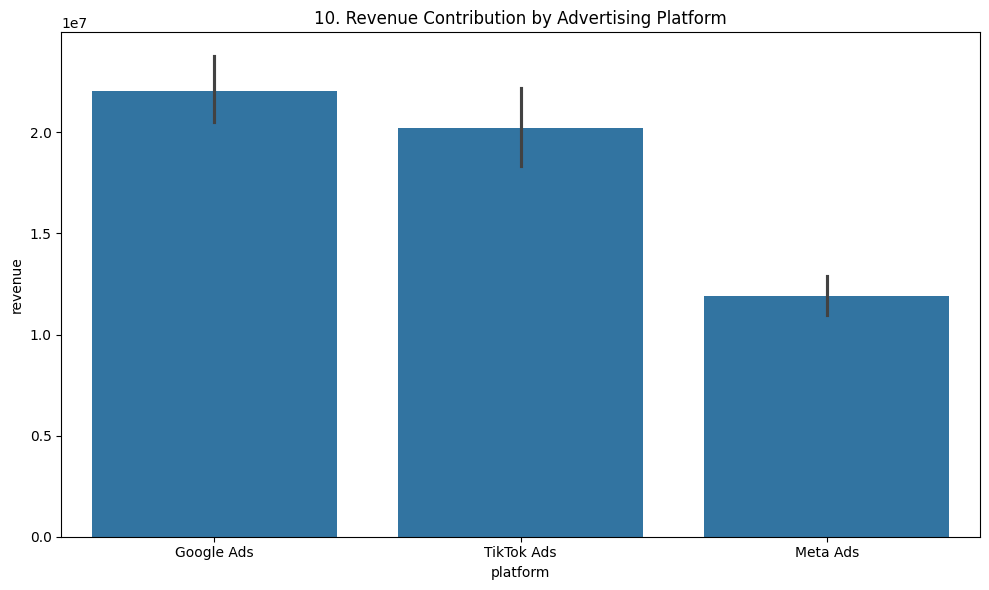

In [22]:
fig = plt.figure(figsize=(10,6))
sns.barplot(data=df, x='platform', y='revenue', estimator=sum)
plt.title(f'{plot_no}. Revenue Contribution by Advertising Platform')
show_fig()
plot_no += 1


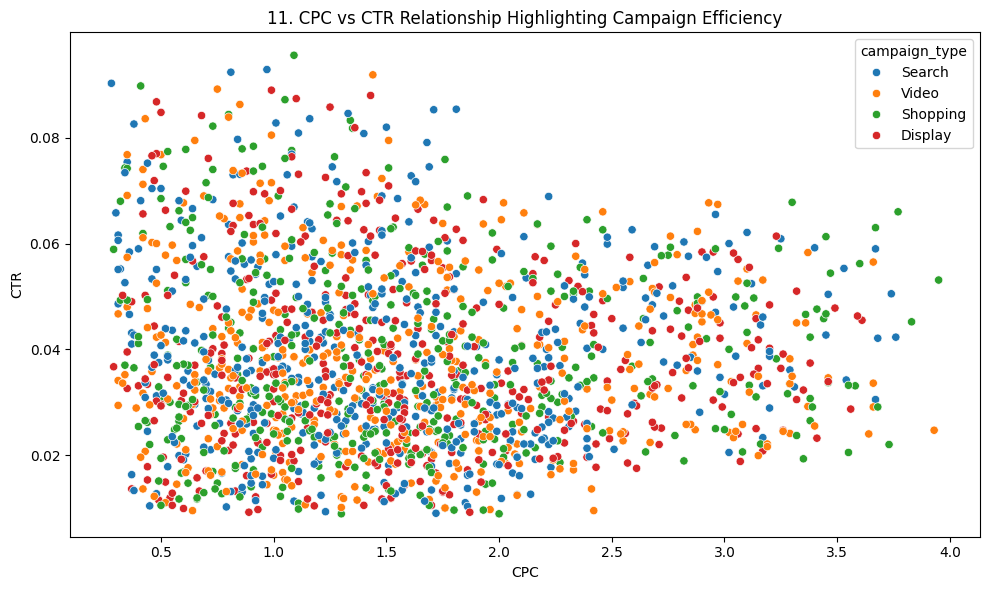

In [23]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='CPC', y='CTR', hue='campaign_type')
plt.title(f'{plot_no}. CPC vs CTR Relationship Highlighting Campaign Efficiency')
show_fig()
plot_no += 1


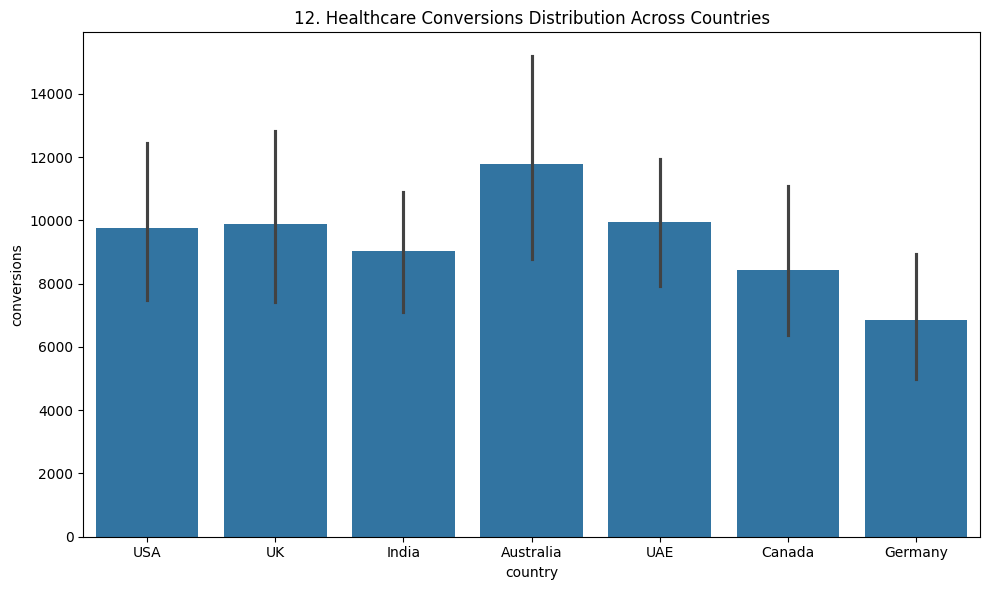

In [24]:
fig = plt.figure(figsize=(10,6))
sns.barplot(data=df[df['industry']=='Healthcare'], x='country', y='conversions', estimator=sum)
plt.title(f'{plot_no}. Healthcare Conversions Distribution Across Countries')
show_fig()
plot_no += 1


# Model Training

## create target variable (profitable vs non-profitable campaign)

In [25]:
df['profit_label'] = (df['ROAS'] >= 1).astype(int)

## select features and target

In [26]:
X = df[['impressions','clicks','CTR','CPC','ad_spend','conversions','CPA']]
y = df['profit_label']

## train test split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## feature scaling

In [28]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## train supervised model (Logistic Regression)

In [29]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## make predictions

In [30]:
y_pred = model.predict(X_test)

## print model accuracy

In [31]:
acc = accuracy_score(y_test, y_pred)
print("Model Accuracy:", round(acc*100, 2), "%")

Model Accuracy: 93.89 %


## plot confusion matrix

Text(95.72222222222221, 0.5, 'Actual')

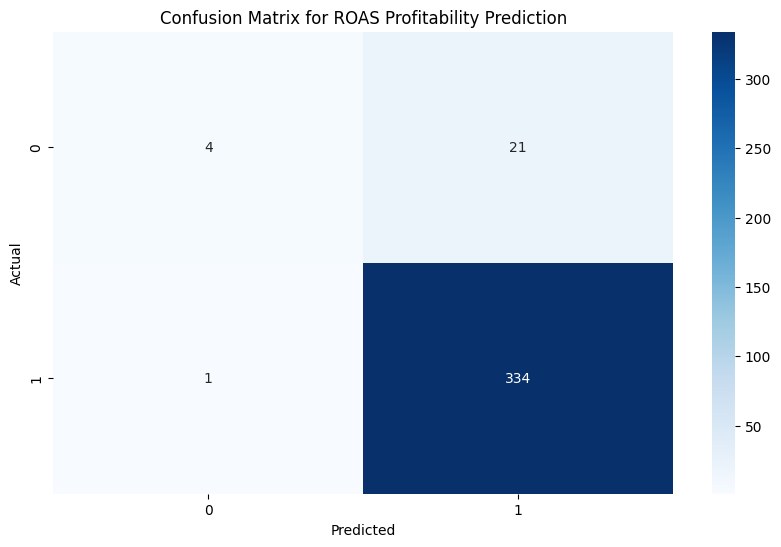

In [32]:
fig = plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for ROAS Profitability Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')